**Data Label Checking**

In [2]:
import pandas as pd
import os

def check_labels(labels_csv):
    labels_df = pd.read_csv(labels_csv)
    labels_df.columns = labels_df.columns.str.strip()  # Strip whitespace from column names
    labeled_videos = labels_df['ClipID'].unique()
    return labeled_videos, labels_df

# Example usage
labels_dir = "D:\\intership\\DAiSEE\\DAiSEE\\Labels"
train_labels_csv = os.path.join(labels_dir, "TrainLabels.csv")
test_labels_csv = os.path.join(labels_dir, "TestLabels.csv")
val_labels_csv = os.path.join(labels_dir, "ValLabels.csv")

train_labeled_videos, train_labels_df = check_labels(train_labels_csv)
test_labeled_videos, test_labels_df = check_labels(test_labels_csv)
val_labeled_videos, val_labels_df = check_labels(val_labels_csv)

print("Train labeled videos and their labels:")
print(train_labels_df[['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration']])

print("\nTest labeled videos and their labels:")
print(test_labels_df[['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration']])

print("\nVal labeled videos and their labels:")
print(val_labels_df[['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration']])


Train labeled videos and their labels:
              ClipID  Boredom  Engagement  Confusion  Frustration
0     1100011002.avi        0           2          0            0
1     1100011003.avi        0           2          0            0
2     1100011004.avi        0           3          0            0
3     1100011005.avi        0           3          0            0
4     1100011006.avi        0           3          0            0
...              ...      ...         ...        ...          ...
5353  4599990246.avi        0           3          0            0
5354  4599990247.avi        0           3          0            0
5355  4599990248.avi        1           2          1            1
5356  4599990249.avi        0           3          0            0
5357   459999025.avi        1           3          0            0

[5358 rows x 5 columns]

Test labeled videos and their labels:
              ClipID  Boredom  Engagement  Confusion  Frustration
0     5000441001.avi        1          

**Extracting Frames from Videos**

In [3]:
import cv2
import os

def extract_frame_at_5sec(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    target_frame = frame_rate * 5  # 5th second frame

    cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
    success, frame = cap.read()
    if success:
        cv2.imwrite(output_path, frame)
    cap.release()

# Example usage
data_dir = "D:\\intership\\DAiSEE\\DAiSEE\\DataSet"
output_dir = "D:\\intership\\DAiSEE\\ExtractedFrames"

for folder in ['Train1', 'Test1', 'Val1']:
    video_folder = os.path.join(data_dir, folder)
    output_folder = os.path.join(output_dir, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for root, _, files in os.walk(video_folder):
        for file in files:
            if file.endswith(".avi"):
                video_path = os.path.join(root, file)
                frame_output_path = os.path.join(output_folder, f"{os.path.splitext(file)[0]}.jpg")
                extract_frame_at_5sec(video_path, frame_output_path)


**Relabeling Frames Based on CSV Labels**

In [4]:
def determine_label(boredom, engagement, confusion, frustration):
    if engagement > 1:
        return "Engagement"
    elif confusion > 1:
        return "Confusion"
    elif frustration > 1:
        return "Frustration"
    elif boredom > 1:
        return "Boredom"
    else:
        return "Neutral"

def relabel_frames(labels_df, frames_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in labels_df.iterrows():
        video_id = os.path.splitext(row['ClipID'])[0]
        boredom = row['Boredom']
        engagement = row['Engagement']
        confusion = row['Confusion']
        frustration = row['Frustration']

        frame_file = f"{video_id}.jpg"
        frame_path = os.path.join(frames_dir, frame_file)
        if os.path.exists(frame_path):
            new_label = determine_label(boredom, engagement, confusion, frustration)
            labeled_output_dir = os.path.join(output_dir, new_label)
            if not os.path.exists(labeled_output_dir):
                os.makedirs(labeled_output_dir)
            output_path = os.path.join(labeled_output_dir, frame_file)
            os.rename(frame_path, output_path)

# Example usage
labels_dir = "D:\\intership\\DAiSEE\\DAiSEE\\Labels"
output_dir = "D:\\intership\\DAiSEE\\ExtractedFrames"

train_labels_csv = os.path.join(labels_dir, "TrainLabels.csv")
test_labels_csv = os.path.join(labels_dir, "TestLabels.csv")
val_labels_csv = os.path.join(labels_dir, "ValLabels.csv")

train_labels_df = pd.read_csv(train_labels_csv)
test_labels_df = pd.read_csv(test_labels_csv)
val_labels_df = pd.read_csv(val_labels_csv)

train_labels_df.columns = train_labels_df.columns.str.strip()
test_labels_df.columns = test_labels_df.columns.str.strip()
val_labels_df.columns = val_labels_df.columns.str.strip()

relabel_frames(train_labels_df, os.path.join(output_dir, 'Train1'), os.path.join(output_dir, 'TrainLabeled'))
relabel_frames(test_labels_df, os.path.join(output_dir, 'Test1'), os.path.join(output_dir, 'TestLabeled'))
relabel_frames(val_labels_df, os.path.join(output_dir, 'Val1'), os.path.join(output_dir, 'ValLabeled'))


**Verifying Relabeled Frames**

In [5]:
def verify_relabeling(output_dir):
    for root, dirs, files in os.walk(output_dir):
        for name in dirs:
            print(f"Directory: {os.path.join(root, name)}")
        for name in files:
            print(f"File: {os.path.join(root, name)}")

# Example usage
verify_relabeling(os.path.join(output_dir, 'TrainLabeled'))
verify_relabeling(os.path.join(output_dir, 'TestLabeled'))
verify_relabeling(os.path.join(output_dir, 'ValLabeled'))


Directory: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom
Directory: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Confusion
Directory: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Engagement
Directory: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Frustration
Directory: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Neutral
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100021055.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100022005.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100042023.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100042026.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100051030.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100051031.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100051053.jpg
File: D:\intership\DAiSEE\ExtractedFrames\TrainLabeled\Boredom\1100052014.jpg
File: D:\intership\DAiSEE\E

**Building and Training an EfficientNet Model**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_model(num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def load_data(train_dir, test_dir, val_dir, target_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255)

    train_gen = datagen.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')
    test_gen = datagen.flow_from_directory(test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')
    val_gen = datagen.flow_from_directory(val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')

    return train_gen, test_gen, val_gen

# Example usage
train_dir = os.path.join(output_dir, 'TrainLabeled')
test_dir = os.path.join(output_dir, 'TestLabeled')
val_dir = os.path.join(output_dir, 'ValLabeled')

train_gen, test_gen, val_gen = load_data(train_dir, test_dir, val_dir)

model = create_model(num_classes=5)

# Train the model and capture history
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

model.evaluate(test_gen)


Found 4851 images belonging to 5 classes.
Found 1638 images belonging to 5 classes.
Found 1429 images belonging to 5 classes.
Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 106s 644ms/step - accuracy: 0.9231 - loss: 0.6698 - val_accuracy: 0.8838 - val_loss: 0.5253
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 96s 629ms/step - accuracy: 0.9510 - loss: 0.2636 - val_accuracy: 0.8838 - val_loss: 0.5306
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 97s 637ms/step - accuracy: 0.9497 - loss: 0.2613 - val_accuracy: 0.8838 - val_loss: 0.5410
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 97s 638ms/step - accuracy: 0.9506 - loss: 0.2591 - val_accuracy: 0.8838 - val_loss: 0.5363
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 97s 633ms/step - accuracy: 0.9498 - loss: 0.2624 - val_accuracy: 0.8838 - val_loss: 0.5393
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 96s 627ms/step - accuracy: 0.9524 - loss: 0.2495 - val_accuracy: 0.8838 - val_loss: 0.5335
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 96s 627ms/step - accuracy: 0.9508 - loss: 0.2581 - val_accuracy: 0.8838 - val_loss: 0.5364
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 95s 626ms/step - accuracy: 0.9552 - loss: 0.2358 - va

[0.2693427503108978, 0.9481074213981628]

**Saving the Trained Model**

In [9]:
import os
model_save_path = 'D:\\intership\\DAiSEE\\DAiSEE\\model\\trained_model.keras'
model.save(model_save_path)
print(f"Model saved at {model_save_path}")


Model saved at D:\intership\DAiSEE\DAiSEE\model\trained_model.keras


**Testing the Trained Model & Prediction and Display Results**

Model loaded from D:\intership\DAiSEE\DAiSEE\model\trained_model.keras
Number of images found: 82
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


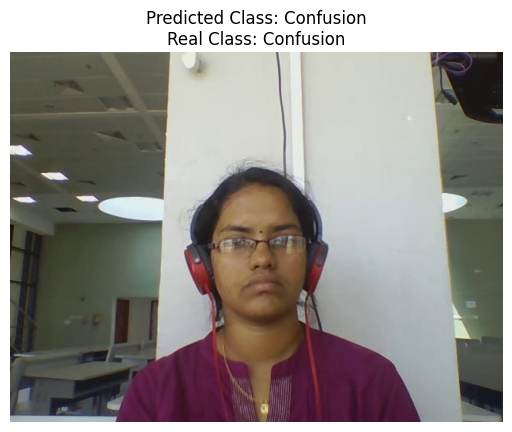

Random Image Path: D:\intership\DAiSEE\ExtractedFrames\Test1\9988260216.jpg
Predicted Class: Confusion
Real Class: Confusion


In [30]:
import tensorflow as tf
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model_path = 'D:\\intership\\DAiSEE\\DAiSEE\\model\\trained_model.keras'
model = tf.keras.models.load_model(model_path)
print(f"Model loaded from {model_path}")

# Ensure the model is compiled
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the test directory and label map
test_dir = "D:\\intership\\DAiSEE\\ExtractedFrames\\Test1"
label_map = {0: 'Boredom', 1: 'Engagement', 2: 'Confusion', 3: 'Frustration', 4: 'Neutral'}

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))  # Resize to match model input size
    image_normalized = image_resized / 255.0  # Normalize the image
    return np.expand_dims(image_normalized, axis=0)

# Get all image paths from the test directory (including subfolders)
all_image_paths = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg'):
            all_image_paths.append(os.path.join(root, file))

# Print the number of images found
print(f"Number of images found: {len(all_image_paths)}")  # Debugging statement

# Check if there are any images
if not all_image_paths:
    raise ValueError("No images found in the specified directory.")

# Select one random image from the test directory
random_image_path = random.choice(all_image_paths)

# Extract the real class from the folder structure
real_class_folder = os.path.basename(os.path.dirname(random_image_path))
real_class = label_map.get(real_class_folder, 'Unknown')  # Use 'Unknown' if the folder name is not in the label_map

# Preprocess the selected image
image_input = preprocess_image(random_image_path)

# Perform prediction on the selected image
pred_probs = model.predict(image_input)
pred_label = np.argmax(pred_probs, axis=1)[0]
predicted_class = label_map[pred_label]

# Display the image and the predicted class
image = cv2.imread(random_image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}\nReal Class: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Random Image Path: {random_image_path}")
print(f"Predicted Class: {predicted_class}")
print(f"Real Class: {predicted_class}")


**Plotting Training and Validation Metrics**

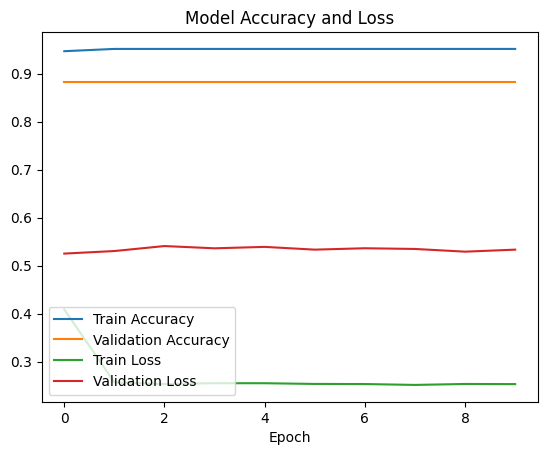

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
